In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
from scipy.io import loadmat
import matplotlib.pyplot as plt

# data1 with 2d

In [2]:
data = loadmat('ex8/ex8data1.mat')
X = data['X']
X_val = data['Xval']
y_val = data['yval']

X.shape, X_val.shape, y_val.shape

((307, 2), (307, 2), (307, 1))

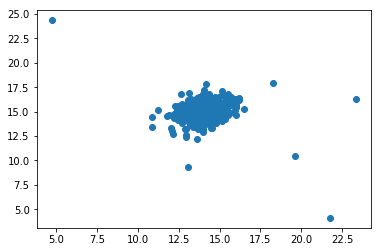

In [3]:
plt.scatter(X[:, 0], X[:, 1])

In [4]:
def get_mu(X):
    return X.mean(axis=0)

def get_sigma2(X, is_mult):
    mu = get_mu(X)
    if is_mult:
        return (np.dot((X - mu).T, (X - mu))) / len(X)
    else:
        return np.diag(np.power((X - mu), 2).mean(axis=0))

In [5]:
get_mu(X)

array([14.11222578, 14.99771051])

In [6]:
get_sigma2(X, is_mult=False)

array([[1.83263141, 0.        ],
       [0.        , 1.70974533]])

In [7]:
get_sigma2(X, is_mult=True)

array([[ 1.83263141, -0.22712233],
       [-0.22712233,  1.70974533]])

In [8]:
def gaussian(X, mu, sigma2):
    p = []
    m, n = X.shape
    p1 = 1 / ((np.power(2*np.pi, n/2)) * np.sqrt(np.linalg.det(sigma2)))
    for i in range(m):
        X_i = X[i].reshape(1, -1)
        p2 = np.exp(-0.5 * (X_i - mu).dot(np.linalg.inv(sigma2)).dot((X_i - mu).T))
        p.append((p1 * p2).squeeze())
    return np.array(p)

In [9]:
def plotContours(mu, sigma2):

    delta = .3  
    x = np.arange(0,30,delta)
    y = np.arange(0,30,delta)
    
    xx, yy = np.meshgrid(x, y)
    points = np.c_[xx.ravel(), yy.ravel()] 
    z = gaussian(points, mu, sigma2)
    z = z.reshape(xx.shape) 
    
    cont_levels = [10**h for h in range(-20,0,3)]
    plt.contour(xx, yy, z, cont_levels)

    plt.title('Gaussian Contours',fontsize=16)

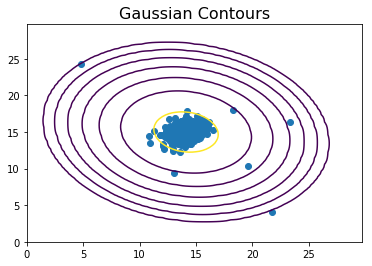

In [10]:
plt.scatter(X[:, 0], X[:, 1])
plotContours(get_mu(X), get_sigma2(X, True))

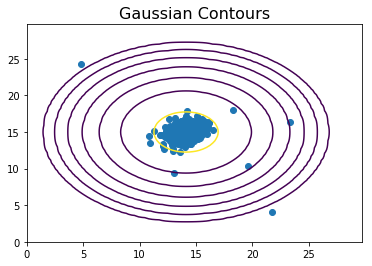

In [11]:
plt.scatter(X[:, 0], X[:, 1])
plotContours(get_mu(X), get_sigma2(X, False))

In [12]:
from sklearn.metrics import f1_score
from copy import deepcopy

pre = gaussian(X, get_mu(X), get_sigma2(X, False)).reshape(-1, 1)
p_val = gaussian(X_val, get_mu(X), get_sigma2(X, True)).reshape(-1, 1)
y = y_val.astype(int)
best_score = 0
best_epsilon = 0

for epsilon in np.linspace(min(p_val)[0], max(p_val)[0], 1000):
    p = (p_val < epsilon).astype(int)
    f1score = f1_score(y, p)
    if f1score > best_score:
        best_score = f1score
        best_epsilon = epsilon
        
print('best epsilon:', best_epsilon, '\nbest f1_score:', best_score)
X_1 = (pre < best_epsilon)
X_1 = np.array([X[i] for i in range(len(X_1)) if X_1[i][0]])

G:\anaconda\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


best epsilon: 9.074844572965703e-05 
best f1_score: 0.8750000000000001


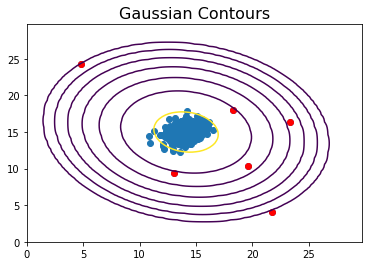

In [13]:
plt.scatter(X[:, 0], X[:, 1])
plotContours(get_mu(X), get_sigma2(X, True))
plt.scatter(X_1[:, 0], X_1[:, 1], marker='o', c='r')

# data2 with n-d (n > 2)

In [14]:
data = loadmat('ex8/ex8data2.mat')
X = data['X']
X_val = data['Xval']
y_val = data['yval']

X.shape, X_val.shape, y_val.shape

((1000, 11), (100, 11), (100, 1))

In [15]:
from sklearn.metrics import f1_score
from copy import deepcopy

pre = gaussian(X, get_mu(X), get_sigma2(X, False)).reshape(-1, 1)
p_val = gaussian(X_val, get_mu(X), get_sigma2(X, False)).reshape(-1, 1)
y = y_val.astype(int)
best_score = 0
best_epsilon = 0

for epsilon in np.linspace(min(p_val)[0], max(p_val)[0], 1000):
    p = (p_val < epsilon).astype(int)
    f1score = f1_score(y, p)
    if f1score > best_score:
        best_score = f1score
        best_epsilon = epsilon
        
print('best epsilon:', best_epsilon, '\nbest f1_score:', best_score)
X_1 = (pre < best_epsilon)
X_1 = np.array([X[i] for i in range(len(X_1)) if X_1[i][0]])

best epsilon: 1.3786074982000245e-18 
best f1_score: 0.6153846153846154


In [16]:
len(X_1)

117

# In sklearn

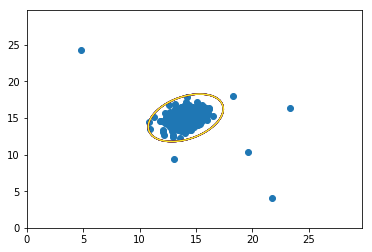

In [17]:
from sklearn.covariance import EllipticEnvelope

data = loadmat('ex8/ex8data1.mat')
X = data['X']
X_val = data['Xval']
y_val = data['yval']

clf = EllipticEnvelope(contamination=6/307)
clf.fit(X)

delta = .3  
x = np.arange(0,30,delta)
y = np.arange(0,30,delta)
    
xx, yy = np.meshgrid(x, y)
points = np.c_[xx.ravel(), yy.ravel()] 

z = clf.decision_function(points)
z = z.reshape(xx.shape)

cont_levels = [10**h for h in range(-20,0,3)]
plt.contour(xx, yy, z, cont_levels)
plt.scatter(X[:, 0], X[:, 1])

# Recommender Systems

In [18]:
data = loadmat('ex8/ex8_movies.mat')

Y = data['Y']
R = data['R']

Y.shape, R.shape

((1682, 943), (1682, 943))

In [19]:
def J(theta, X, y, R, l):
    e = np.sum(np.power((np.dot(theta, X.T).T - Y) * R, 2))
    l1 = l * np.sum(np.power(theta, 2))
    l2 = l * np.sum(np.power(X, 2))
    return (e + l1 + l2) / 2

In [20]:
mat = loadmat('ex8/ex8_movieParams.mat')
X = mat['X']
theta = mat['Theta']
nu = int(mat['num_users'])
nm = int(mat['num_movies'])
nf = int(mat['num_features'])

In [21]:
X.shape, theta.shape, R.shape,Y.shape

((1682, 10), (943, 10), (1682, 943), (1682, 943))

In [22]:
J(theta, X, y, R, 0)

27918.640124544203

In [23]:
def gradient(theta, X, y, R, l):
    x_g = np.dot(((np.dot(theta, X.T).T - Y) * R), theta).sum()
    x_reg = l * X
    
    theta_g = np.dot(((np.dot(theta, X.T).T - Y) * R).T, X).sum()
    theta_reg = l * theta
    return x_g+x_reg, theta_g+theta_reg

In [24]:
def normalizeRatings(Y, R):
    Ymean = (Y.sum(axis=1) / R.sum(axis=1)).reshape(-1,1)
    Ynorm = (Y - Ymean) * R
    return Ynorm, Ymean

In [25]:
def GD(theta, X, y, R, l, lr, epoch):
    theta_temp = theta
    X_temp = X
    all_cost = []
    for i in range(epoch):
        g = gradient(theta, X, y, R, l)
        X_temp = X - lr * g[0]
        theta_temp = theta - lr * g[1]
        X = X_temp
        theta = theta_temp
        cost = J(theta, X, y, R, l)
        all_cost.append(cost)
        if i % (epoch / 10) == 0:
            print('epoch:', i+1, 'cost:', cost)
    
    return X, theta, all_cost

In [26]:
X = np.random.random((nm, nf))
theta = np.random.random((nu, nf))

X.shape, theta.shape

((1682, 10), (943, 10))

In [27]:
Y_norm, Y_mean = normalizeRatings(Y, R)

Y_norm.shape

(1682, 943)

In [28]:
lr = 2e-8
epoch = 50
l = 5

In [29]:
f_X, f_theta, all_cost = GD(theta, X, Y_norm, R, l, lr, epoch)

epoch: 1 cost: 153129.98184894238
epoch: 6 cost: 130251.25122706321
epoch: 11 cost: 123491.21652287061
epoch: 16 cost: 122027.44711292973
epoch: 21 cost: 121867.8055949261
epoch: 26 cost: 121931.71871251192
epoch: 31 cost: 121995.1411791913
epoch: 36 cost: 122032.07378388601
epoch: 41 cost: 122050.23810929486
epoch: 46 cost: 122058.06841558004


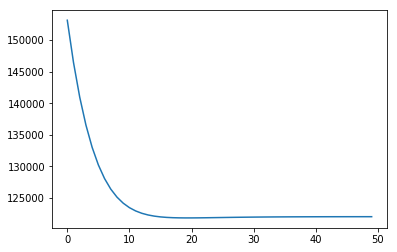

In [30]:
plt.plot(all_cost)

In [31]:
movies = []  
with open('ex8/movie_ids.txt','r', encoding='ISO-8859-1') as f:
    for line in f:
        movies.append(' '.join(line.strip().split(' ')[1:]))

In [32]:
my_ratings = np.zeros((1682,1))

my_ratings[0]   = 4
my_ratings[97]  = 2
my_ratings[6]   = 3
my_ratings[11]  = 5
my_ratings[53]  = 4
my_ratings[63]  = 5
my_ratings[65]  = 3
my_ratings[68]  = 5
my_ratings[182] = 4
my_ratings[225] = 5
my_ratings[354] = 5

for i in range(len(my_ratings)):
    if my_ratings[i] > 0:
        print(my_ratings[i], movies[i])

[4.] Toy Story (1995)
[3.] Twelve Monkeys (1995)
[5.] Usual Suspects, The (1995)
[4.] Outbreak (1995)
[5.] Shawshank Redemption, The (1994)
[3.] While You Were Sleeping (1995)
[5.] Forrest Gump (1994)
[2.] Silence of the Lambs, The (1991)
[4.] Alien (1979)
[5.] Die Hard 2 (1990)
[5.] Sphere (1998)


In [33]:
len(movies)

1682

In [34]:
pred_mat = f_X @ f_theta.T

In [35]:
pred = pred_mat[:,-1] + Y_mean.flatten()

In [36]:
pred_sorted_idx = np.argsort(pred)[::-1]

In [37]:
print("Top recommendations for you:")
for i in range(10):
    print('Predicting rating %0.1f for movie %s.' \
          %(pred[pred_sorted_idx[i]],movies[pred_sorted_idx[i]]))

print("\nOriginal ratings provided:")
for i in range(len(my_ratings)):
    if my_ratings[i] > 0:
        print('Rated %d for movie %s.'% (my_ratings[i],movies[i]))

Top recommendations for you:
Predicting rating 9.3 for movie All About Eve (1950).
Predicting rating 9.3 for movie Vertigo (1958).
Predicting rating 9.3 for movie Horseman on the Roof, The (Hussard sur le toit, Le) (1995).
Predicting rating 9.3 for movie Manchurian Candidate, The (1962).
Predicting rating 9.3 for movie Faust (1994).
Predicting rating 9.2 for movie Lost Horizon (1937).
Predicting rating 9.2 for movie Star Kid (1997).
Predicting rating 9.1 for movie Schindler's List (1993).
Predicting rating 9.1 for movie Someone Else's America (1995).
Predicting rating 9.1 for movie Godfather, The (1972).

Original ratings provided:
Rated 4 for movie Toy Story (1995).
Rated 3 for movie Twelve Monkeys (1995).
Rated 5 for movie Usual Suspects, The (1995).
Rated 4 for movie Outbreak (1995).
Rated 5 for movie Shawshank Redemption, The (1994).
Rated 3 for movie While You Were Sleeping (1995).
Rated 5 for movie Forrest Gump (1994).
Rated 2 for movie Silence of the Lambs, The (1991).
Rated 4 f